# Lab: Null Hypotheses

# Part 1:  Correlation between two independent random variables. 

In [sample statistics](https://cdds-uiuc.github.io/simles-book/content/Module01/M01_N04_SampleStatistics.html#) we talked about how one can get spurious correlations between two independent random variables. 

Let's say we have two set of $N$ observations from two random variables $X_1,X_2$ and we want to test the null hypothesis that they are independent using squared correlation ($\rho^2$) where $\rho$ is the Pearson correlation coefficient. 

## Question 1.1
For $N=20$ simulate numerically then null distribution of $\rho^2$ under the nully hypothesis that $X_1$ and $X_2$ are independent Gaussian random variables with the same variance. Plot the distribution and the critical value for rejecting the null hypothesis with 95% confidence. 

## Question 1.2
Plt critical value as a function of $N$ for values of $N$ between 5 and 50. 






# Part 2: Obliquity Pacing of Pleistocene Ice Ages

Required reading: <a href="https://doi.org/10.1038/nature03401">Huybers and Wunsch (2004)</a>. 

In this lab we will apply hypothesis testing to evaluate whether obliquity might be pacing the Pleistocene Ice Ages.
This lab broadly follows <a href="https://doi.org/10.1038/nature03401">Huybers and Wunsch (2004)</a>. 

Since the data from that paper is not available, we will use a slightly different dataset and technique. Ideally, the result of our hypothesis test should not be too sensitive to small methodological differences. 

In [1]:
#%reset 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import optimize
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Data: Pleistocene $\delta^{18}$O and Obliquity

We'll use the [Lisiecky and Raymo](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071) stack of sediment $\delta^{18}O$ measurements, which is representative of ice volume during the Pleistocene Ice Ages. 

We'll use the Berger '91 Orbital solution to look at variations in Obliquity over the last 700kyrs.

In [2]:
# Let's load the data and take a look at it
url='https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/LR04.csv'
df_LR04   =pd.read_csv(url);
age=df_LR04['age']
d18=df_LR04['d18O']

# Load orbital solutions
url='https://github.com/cdds-uiuc/simles-book/raw/main/content/Module02/data/orbital.csv'
df_orbital=pd.read_csv(url);
orb_age=-df_orbital['age']
obliq  =df_orbital['obliquity']

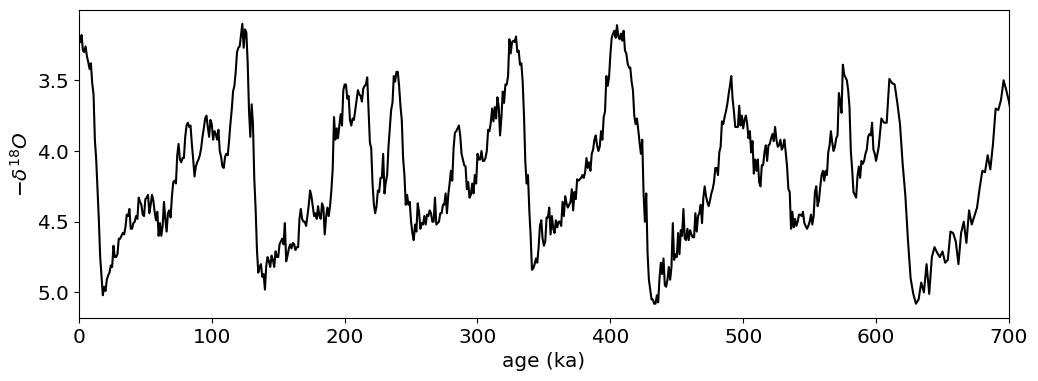

In [3]:
fig,ax=plt.subplots(1,1,figsize=[12,4])
ax.plot(age,d18,'k')
ax.set_ylabel(r'$-\delta^{18}O$');
ax.set_xlim(0,700)
ax.set_xlabel('age (ka)')
ax.invert_yaxis()

Following hallowed paleoclimate tradition we will simply identify the mid-points of terminations by hand. We'll then visualize the data

In [4]:
terminations=np.asarray([622, 534, 423, 336, 244, 220, 132, 13])

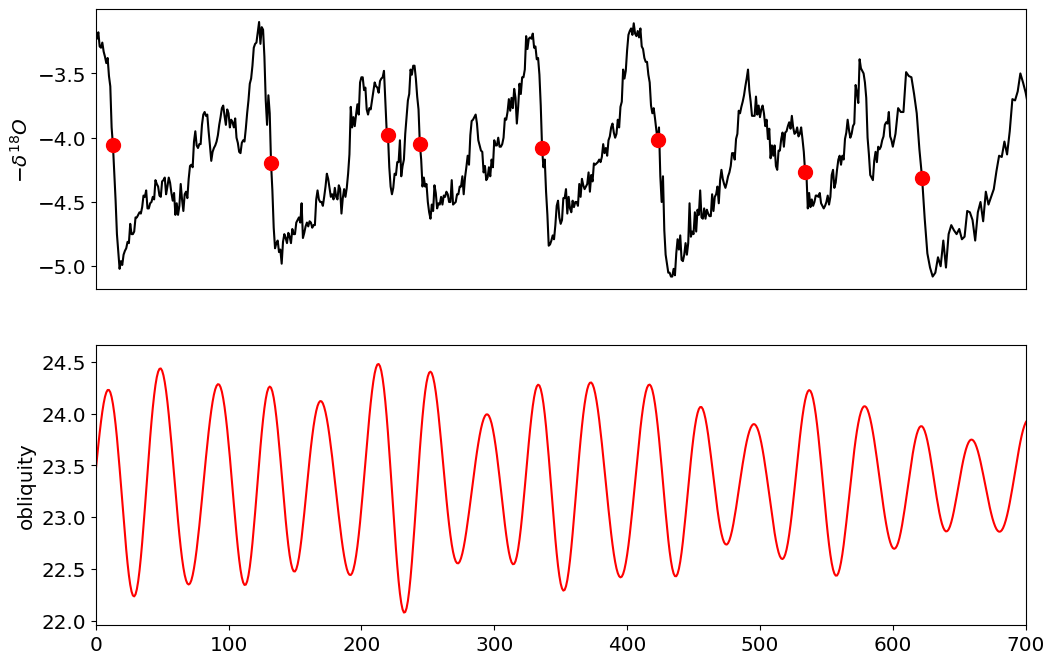

In [5]:
fig,ax=plt.subplots(2,1,figsize=[12,8])
ax[0].plot(age,-d18,'k')
ax[0].set_ylabel(r'$-\delta^{18}O$');
ax[0].set_xticks([])
#ax[0].set_ylim(bottom=-1.1,top=1.1)

# plot terminations
terminations_df=df_LR04[df_LR04['age'].isin(terminations)]
ax[0].plot(terminations_df['age'],-terminations_df['d18O'],'ro',markersize=10)

ax[1].plot(orb_age,obliq,'r')
ax[1].set_ylabel(r'obliquity');

for j in range(2):
    ax[j].set_xlim(left=0,right=700)

# Phase of terminations
Next, we'll need to compute the phase of obliquity at the moment of terminations.
Huybers Wunsch 2004 mention a "stroboscopic" sampling of obliquity, but do not give much detail. 
So instead, we'll use a very rough methodology illustrated below, where we take advantage of the fact that obliquity varies with a period of **aproximately** 41kyr.
## Illustration of phase calculation:
We'll take at a point in time $t_0$ and we'll look at the previous $41$ kyr before $t_0$ (one full period of obliquity). We'll normalize obliquity to have zero mean, and a range of -1 to 1, and call the normalized obliquity over the 41ka preceeding $t_0$ as $y(t_0)$.

$$y(t_0)=\frac{obliq(t_0)-\overline{obliq(t_0)}}{\left[\text{max}(obliq(t_0))-\text{min}(obliq(t_0))\right]/2}$$


We'll compare this normalized obliquity with a cosine function 

$$\hat y(t_0,\phi) =\cos\left(2\pi\frac{t-t_0}{T} +\phi\right)$$,

where$\phi$ is the phase difference. 

If the best fit between normalized obliquity, $y(t_0)$ and the cosine $\hat y(t_0,\phi)$ is obtained for $\phi=0$ that means that obliquity peaks right at $t_0$. In the example below, for $t_0$ the best fit is for $\phi=60$, indicating that the obliquity peaked before $t_0$. Since the entire cycle of 360 degrees takes 41 years, it means obliquity peaked at a time $t=60/360*41\approx 9$ ka.  

In [6]:
# Some functions we need to compute phase
t0=42
period=41
time=t0+np.arange(41)

def normalize(obliq):
    y=(obliq-np.mean(obliq))/(np.max(obliq)-np.min(obliq))*2
    return y

def y_hat(phi):
    period=41
    y_hat = np.cos(2*np.pi*np.arange(41)/41+phi*np.pi/180)
    return y_hat

(42.0, 84.0)

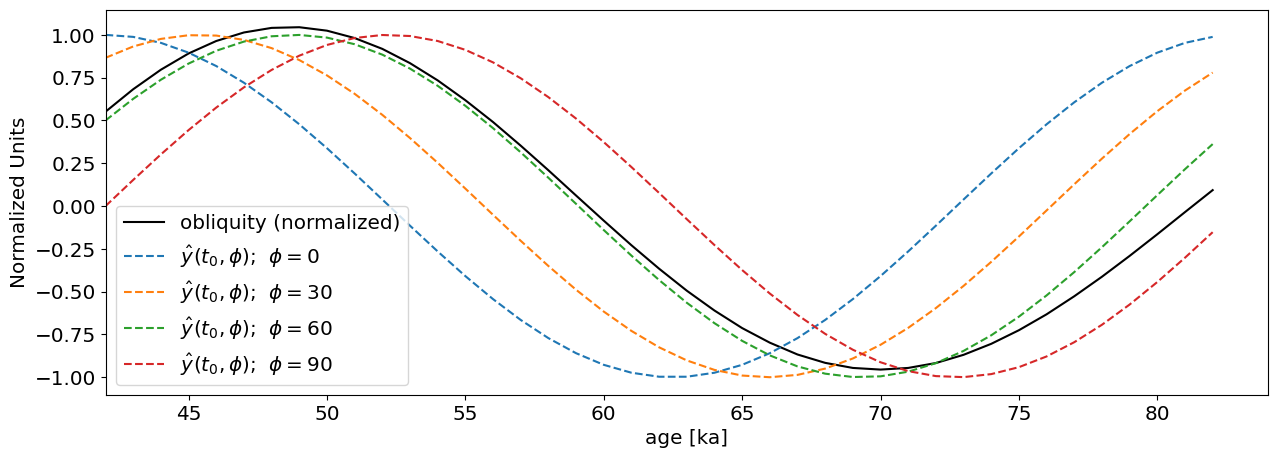

In [7]:
fig,ax=plt.subplots(1,1)
ax.plot(time,normalize(obliq[time]),'k',label='obliquity (normalized)')

ax.plot(time,y_hat(phi=0),'--',label=r'$\hat y(t_0,\phi)$;  $\phi=0$')
ax.plot(time,y_hat(phi=-30),'--',label=r'$\hat y(t_0,\phi)$;  $\phi=30$')
ax.plot(time,y_hat(phi=-60),'--',label=r'$\hat y(t_0,\phi)$;  $\phi=60$')
ax.plot(time,y_hat(phi=-90),'--',label=r'$\hat y(t_0,\phi)$;  $\phi=90$')
#ax.vlines(t0,-1,1,'k')
ax.legend();
ax.set_xlabel('age [ka]')
ax.set_ylabel('Normalized Units')
ax.set_xlim(left=t0)

## Phase estimation
At any point $t_0$ we compute the phase of obliquity by finding the phase difference $\phi$ that minimizes the misfit over the 41 ka preceeding $t_0$ between the normalized obliquity and a shifted cosine 

$$\phi =\arg \text{min}_\phi \left[J(\phi,t_0)\right]$$  

$$J(\phi, t_0)=\sum_{t=t_0}^{t_0+41}\left[ y(t)-\cos\left(2\pi\frac{t-t_0}{T} +\phi\right)  \right]^2$$
$$J(\phi, t_0)=\sum_{t=t_0}^{t_0+41}\left[ y(t)-\hat y(\phi,t,t_0)  \right]^2$$

In [8]:
# define a cost function that computes the phase misfit 
def J_cost(phi,y):
    res=np.sum((normalize(y)-y_hat(phi))**2)
    return res

obliq_phase=np.zeros(700)
t0=np.arange(700)

# for each time point over the last 700kyr, compute the phase as the phase that minimizes the misfit:
for j in np.arange(700):
    time=t0[j]+np.arange(41)
    y=obliq[j:j+41]
    out=optimize.least_squares(J_cost,0,args=[y]);
    obliq_phase[j]=out.x[0]

We can plot the phase of obqliquity (normalized such that $-180^\circ:180^\circ$ corresponds to $-1:1$). Our estimation seems to have worked pretty well. Notice that the obliquity minima correspond to $\phi=-1\equiv 180^\circ$ degrees of phase difference, and the obliquity maxima correspond to a phase of $\phi=0\equiv 0^\circ$

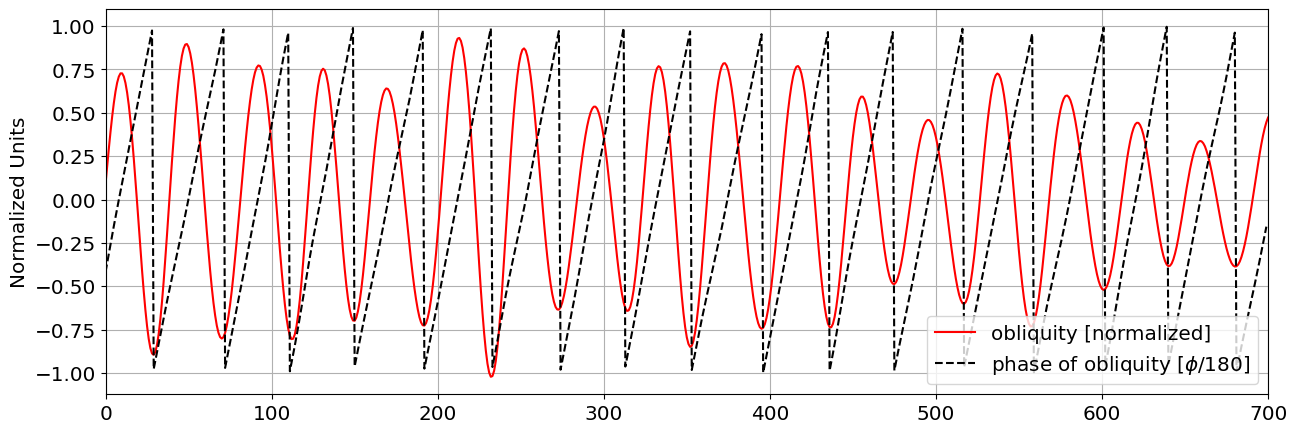

In [9]:
fig,ax=plt.subplots(1,1)
ax.plot(orb_age,normalize(obliq),'r',label='obliquity [normalized]')
ax.plot(orb_age[0:700],obliq_phase/180,'k--',label=r'phase of obliquity $[\phi/180]$')

ax.set_ylabel('Normalized Units');
ax.set_xlim(left=0,right=700)

ax.legend()
ax.grid()

Next we'll evaluate the phase of obliquity at glacial terminations, plot the phasors and compute Rayleigh's R (Fig.1 in Huybers & Wunsch 2004).

Rayleigh's R is the test statistic for our null hypothesis test. It is  measure of how tight are obliquity and terminations coupled. If R is large, than terminations always happen near the same phase of obliquity. If R is small, terminations can occur at any point in an an obliquity cycle. 


In [10]:
# compute the phase of obliquity at terminations and transform the phase in radians
phi_obliq_terms    =obliq_phase[np.asarray(terminations)]*np.pi/180

# compute Raileigh's R
R_obliq=1/8*np.abs(np.sum(np.cos(phi_obliq_terms)+1j*np.sin(phi_obliq_terms)))

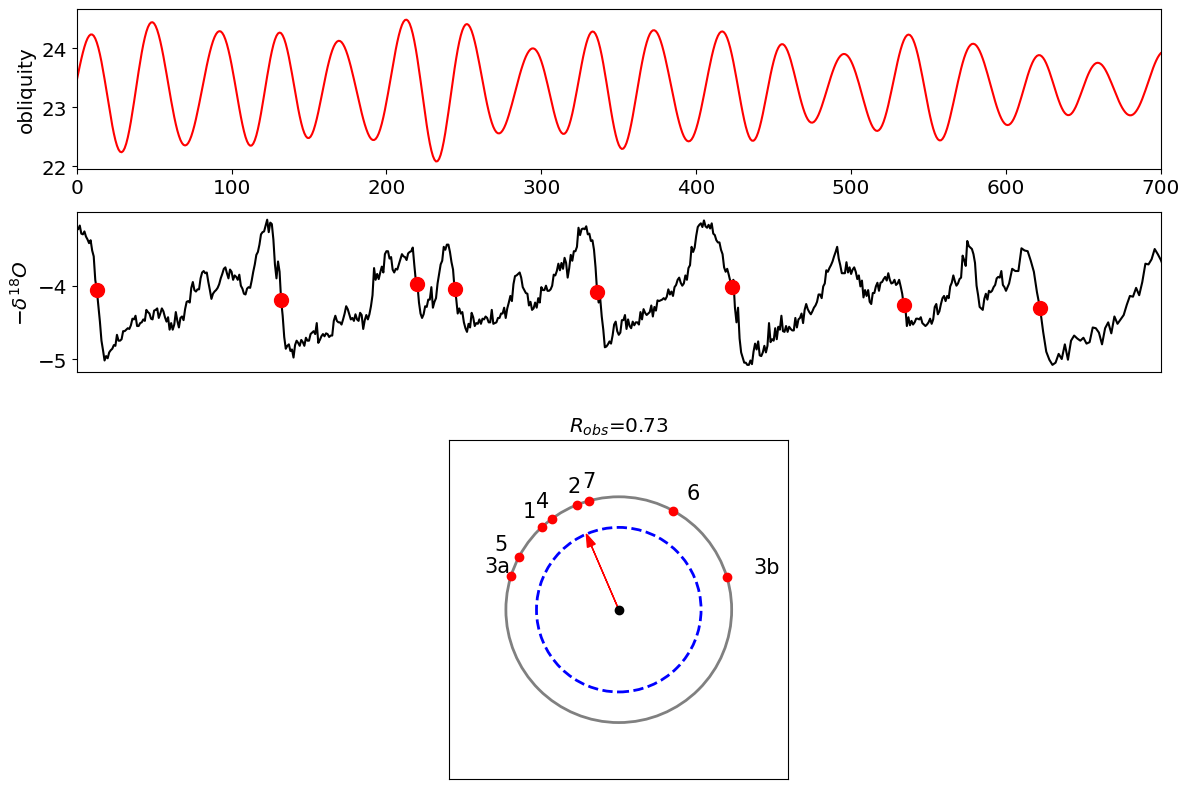

In [11]:
plt.figure(figsize=[12,8])

#plot obliquity
plt.subplot(4,1,1)
plt.plot(orb_age,obliq,'r')
plt.ylabel(r'obliquity');
plt.xlim(left=0,right=700)

# plot d18O stack and terminations
plt.subplot(4,1,2)
plt.plot(age,-d18,'k')
terminations_df=df_LR04[df_LR04['age'].isin(terminations)]
plt.plot(terminations_df['age'],-terminations_df['d18O'],'ro',markersize=10)
plt.ylabel(r'$-\delta^{18}O$');
plt.xticks([])
plt.xlim(left=0,right=700)
#ax[0].set_ylim(bottom=-1.1,top=1.1)


plt.subplot(2,1,2)

ax=plt.gca()

x=-np.sin(phi_obliq_terms)
y=np.cos(phi_obliq_terms)
labels=['7','6','5','4','3b','3a','2','1']

circle_1 = plt.Circle(( 0 , 0 ), radius=1,facecolor='None' ,edgecolor=[0.5,0.5,0.5],linewidth=2)
circle_r = plt.Circle(( 0 , 0 ), radius=R_obliq,facecolor='None' ,edgecolor='b',linewidth=2,linestyle='--')

ax.add_artist(circle_1)
ax.add_artist(circle_r)
plt.arrow(0,0,1/8*np.sum(x),1/8*np.sum(y),length_includes_head=True,head_width=0.075,color='r')
plt.plot(x,y,'ro')
plt.plot(0,0,'ko')

ax.set_aspect( 1 )
plt.xticks([])
plt.yticks([])
plt.xlim(left=-1.5,right=1.5)
plt.ylim(bottom=-1.5,top=1.5)
plt.title('$R_{obs}$='+np.array2string(R_obliq,precision=2))

for j in range(8):
    ax.annotate(labels[j],(x[j],y[j]),textcoords='offset points',xytext=(x[j]*20,y[j]*10),fontsize=15)

    
plt.tight_layout()


In the figure above the circle represents the phase of obliquity. Each red dot represents the phase of obliquity at each of the terminations (1-7). These would be called phasors. 

Rayleigh's $R$ represents a vector average of the phasors for all terminations. 

# The Null Hypothesis

Rayleigh's R is the test statistic for our null hypothesis test. It is  measure of how tight are obliquity and terminations coupled.

We want to know whether such tight coupling could arise by chance. To do so will generate a null hypothesis wherein glacial terminations are not affected by obliquity. We will then compute the $R$ statistic between obliquity and this model for termination. The model is described in Huybers & Wunsch 2004:

$$ \text{if } V_t<T_0:\;V_{t+1}=V_t+\eta_t$$ 

where $\eta_t \sim \mathcal N (\mu=1,\sigma=2)$. The non-zero mean will cause an average increase in ice volume. When the ice volume crosses the threshold $V_t>T_0$, it will deglaciate completely over a period of 10 kyr. 

In [13]:
from scipy import stats

def H0(obliq_phase):
    V=np.zeros(700)   #initialize ice volume
    t=0             #starting point
    T0=90             #threshold for deglaciation
    terminations=[]   #list to store time of termination
    
    while t<699:    
        if V[t]<T0:    # below threshold
            V[t+1]=V[t]+stats.norm.rvs(loc=1.1,scale=2) 
            t=t+1;        
        elif t<689:     #crossing threshold at >10ky before present
            terminations.append(t+5)            #note termination
            V[t:t+10]=np.linspace(V[t],0,10)  #deglaciate in 10kye
            t=t+10  
        else:
            t=700;
            #we have an exception to catch.
            #if we cross the threshold with less than 10ky left before present day, 
            # we can't just skip 10ky. 
            
            #V[]=np.linspace(0,V[t],10)[t:698]  #only keep data until present day
            #if t>=5:    
            #    terminations.append(t+5)
            #t=0

    np.size(terminations)
    phi_obliq_terms    =obliq_phase[np.asarray(terminations)]*np.pi/180
    R_obliq=1/8*np.abs(np.sum(np.cos(phi_obliq_terms)+1j*np.sin(phi_obliq_terms)))

        
    return R_obliq, terminations,phi_obliq_terms,V


Let's generate two realizations of the null nypothesis and plot them. We'll plot obliquity two realizations of the d18O stack under the null hypothesis, and the phasor R. 


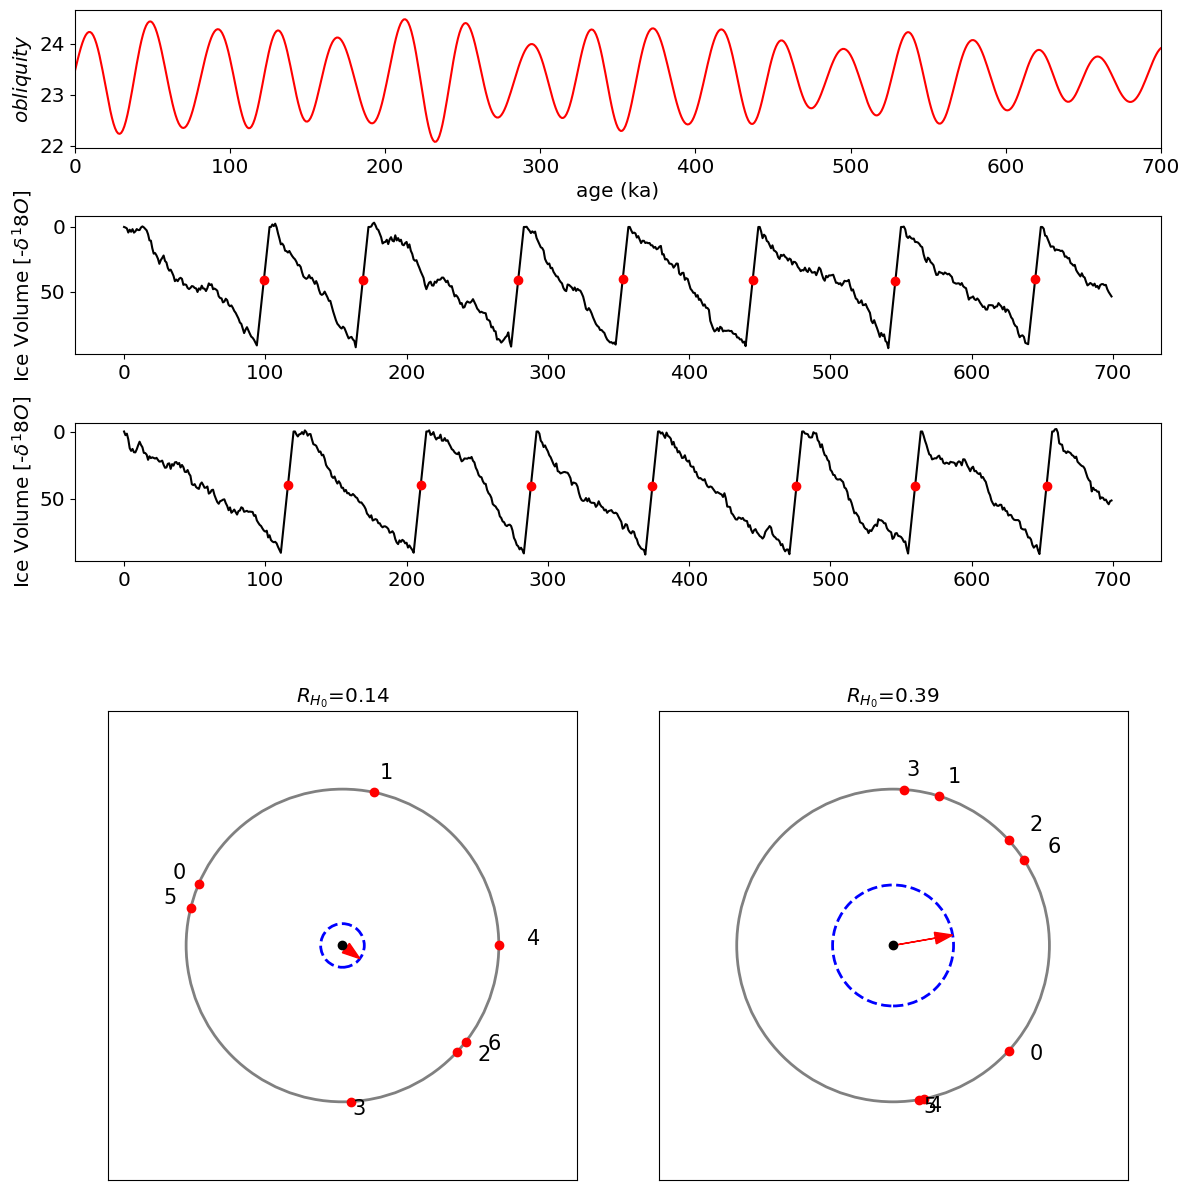

In [14]:
fig = plt.figure(figsize=[12,12])
plt.subplot(6,1,1)

ax=plt.gca()
ax.plot(orb_age,obliq,'r')
ax.set_ylabel('$obliquity$');
ax.set_xlabel('age (ka)');
ax.set_xlim(0,700);
plt.tight_layout()

for k in range(2):


    R_obliq_H0,terminations_H0,phi_obliq_terms_H0,V=H0(obliq_phase)

    plt.subplot(6,1,k+2)
    ax=plt.gca()
    ax.plot(V,'k')
    ax.plot(terminations_H0,V[terminations_H0],'ro')
    ax.set_ylabel(r'Ice Volume [-$\delta^18 O$]');
    ax.invert_yaxis()

    
    plt.subplot(2,2,k+3)
    ax=plt.gca()
    x=-np.sin(phi_obliq_terms_H0)
    y=np.cos(phi_obliq_terms_H0)
    labels=np.arange(np.size(terminations_H0))

    circle_1 = plt.Circle(( 0 , 0 ), radius=1,facecolor='None' ,edgecolor=[0.5,0.5,0.5],linewidth=2)
    circle_r = plt.Circle(( 0 , 0 ), radius=R_obliq_H0,facecolor='None' ,edgecolor='b',linewidth=2,linestyle='--')

    ax.add_artist(circle_1)
    ax.add_artist(circle_r)
    ax.arrow(0,0,1/8*np.sum(x),1/8*np.sum(y),length_includes_head=True,head_width=0.075,color='r')
    ax.plot(x,y,'ro')
    ax.plot(0,0,'ko')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect( 1 )
    ax.set_xlim(left=-1.5,right=1.5)
    ax.set_ylim(bottom=-1.5,top=1.5)
    ax.set_title('$R_{H_0}$='+np.array2string(R_obliq_H0,precision=2))


    for j in range(np.size(terminations_H0)):
        ax.annotate(labels[j],(x[j],y[j]),textcoords='offset points',xytext=(x[j]*20,y[j]*10),fontsize=15)

plt.tight_layout()
    


# Exercises:

## Exercise 1: Evaluate $H_0$
Generate a distribution of the null hypothesis, $H_0$, that is a distribution of the R-statistic for samples of the noise-model. Evaluate the p-value for the R-statistics of the glacial terminations.

Can we still reject the null hypothesis, despite our simpler approach? 



## Exercise 3: Time between terminations

Reproduce the distribution of time between terminations for both the null hypothesis $H_0$, and the alternate hypothesis $H_1$, and overlay the observed time between terminations. The distribution for $H_1$ is plotted in Figure 2d in Huybers Wunsch 2004. 



## Question 2.1: Evaluate $H_0$
Generate a distribution of the null hypothesis, $H_0$, that is a distribution of the R-statistic for samples of the noise-model. Evaluate the p-value for the R-statistics of the glacial terminations.

To do this, follow the example in the Null Hypothesis notebook. Generate 5000 realizations of  $R_{H_0}$.Plot the histogram of $R_{H_0}$, the critical value $R_{crit}$ and the observed value $R_{obs}$.

Can we still reject the null hypothesis, despite our simpler approach? 



In [15]:
# Solution:

In [16]:
R_obliq_H0=np.zeros(5000)
for j in range(5000):    
    R_obliq_H0[j],terminations_H0,phi_obliq_terms_H0,V=H0(obliq_phase)

R_crit=np.percentile(R_obliq_H0,95);

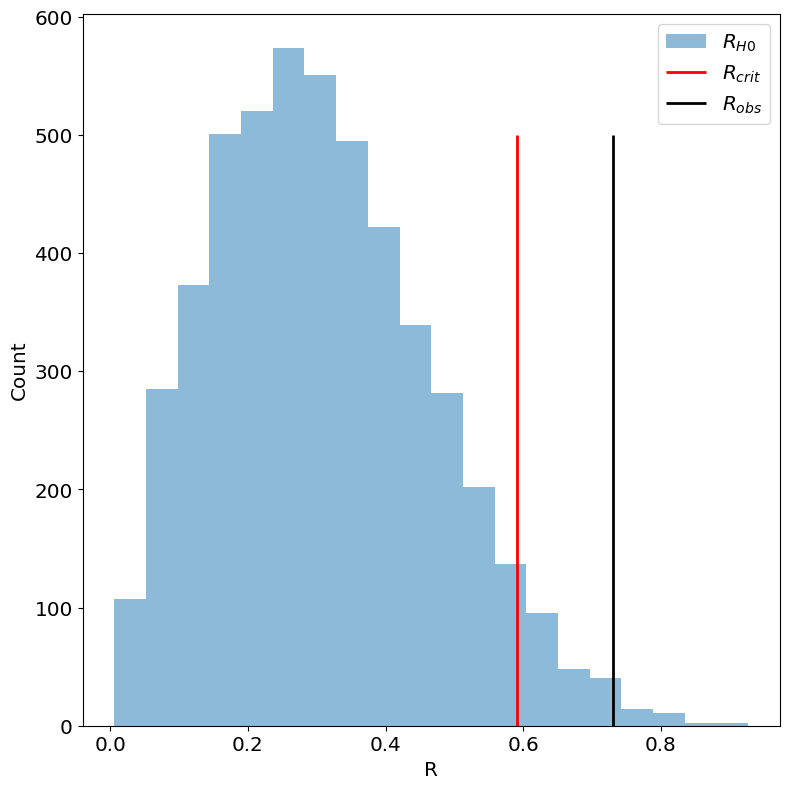

In [17]:
fig=plt.subplots(1,figsize=[8,8])


plt.hist(R_obliq_H0,20,label='$R_{H0}$',alpha=0.5)
plt.vlines(R_crit,0,500,'r',linewidth=2,label=r'$R_{crit}$')
plt.vlines(0.73,0,500,'k',linewidth=2,label=r'$R_{obs}$')

p_obs=1-stats.percentileofscore(R_obliq_H0,0.73)/100
#plt.plot(0.73,0.2,'vk',markersize=20,label=r'$R_{obs}$')
plt.xlabel('R')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

## Question 2.2: Alternate hypothesis 

Generate an alternate hypothesis as described in Eqn (2) in Huybers & Wunsch 2004. You will need to take the function H0 (modelling Eqn 1) and make a very simialr funcion H1 (modelling Eqn 2) to model the alternate hypothesis. In this situation, the threshold needs to be dependent on normalized obliquity.

Use a value of a=20 for Eqn 2. (rather than a=15 suggested in the paper).

Are the observations consistent with the alternate hypothesis?

In [183]:
#

In [184]:
R_obliq_H1=np.zeros(5000)
for j in range(5000):    
    R_obliq_H1[j],terminations_H1,phddi_obliq_terms_H1,V=H1(obliq_phase)

R_crit_H1=np.percentile(R_obliq_H1,95);
R_crit_H0=np.percentile(R_obliq_H0,95);

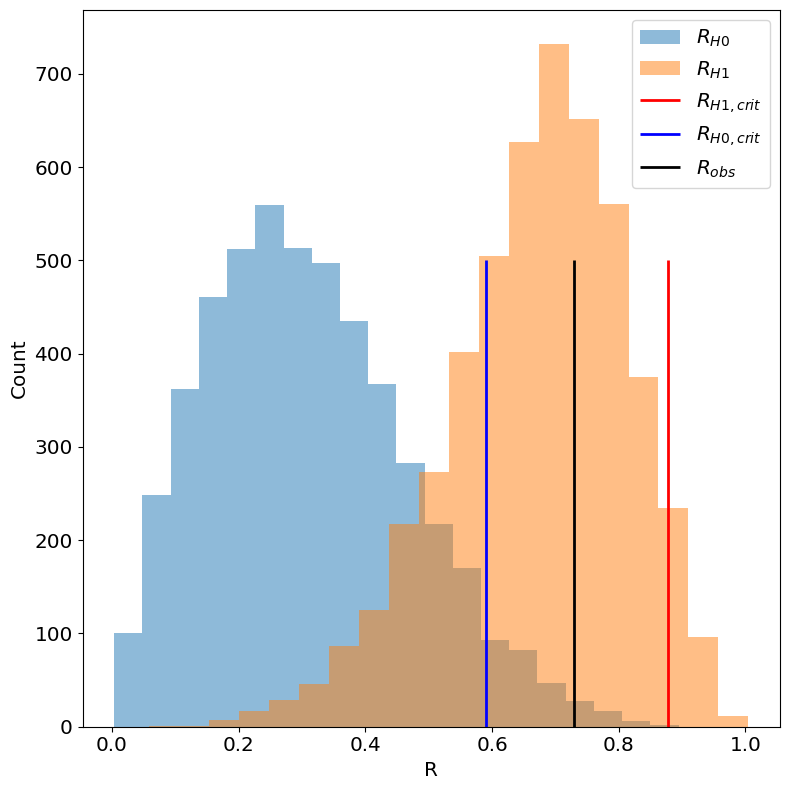

In [186]:
fig=plt.subplots(1,figsize=[8,8])

plt.hist(R_obliq_H0,20,label='$R_{H0}$',alpha=0.5)
plt.hist(R_obliq_H1,20,label='$R_{H1}$',alpha=0.5)
plt.vlines(R_crit_H1,0,500,'r',linewidth=2,label=r'$R_{H1,crit}$')
plt.vlines(R_crit_H0,0,500,'b',linewidth=2,label=r'$R_{H0,crit}$')
plt.vlines(0.73,0,500,'k',linewidth=2,label=r'$R_{obs}$')

p_obs=1-stats.percentileofscore(R_obliq_H1,0.73)/100
#plt.plot(0.73,0.2,'vk',markersize=20,label=r'$R_{obs}$')
plt.xlabel('R')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()